## Need to modify codes for your purpose

##Load data files

In [ ]:
import glob
fnames1 = glob.glob('Cleaned_data_1/*.txt')
fnames2 = glob.glob('Cleaned_data_2/*.txt')
fnames = fnames1 + fnames2

In [ ]:
import glob
fnames1 = glob.glob('Cleaned_data_7/*.txt')
fnames2 = glob.glob('Cleaned_data_8/*.txt')
fnames = fnames1 + fnames2

##Prepare NLTK
word_tokenize, punkt for removing stopwords

In [ ]:
import nltk
#dir(nltk)
nltk.download('punkt')
words = nltk.word_tokenize(data[0])
print(words)

## Read content from files

Without sorting file names, the order is ragged.

In [ ]:
all_data = []
#for fname in fnames:
for fname in sorted(fnames):
    #data = open(fname, 'r').readlines()
    data = open(fname, 'r', encoding='utf-8-sig').readlines() #not to read in '\ufeff'
    print(fname, len(data))
    all_data.extend(data)
print('cummulated all', len(all_data))

## Tokenize texts to count word like tokens

In [ ]:
import nltk
nltk.download('punkt')
all_tokens = []
for data in all_data:
    words = nltk.word_tokenize(data)
    all_tokens.extend(words)
print(all_tokens[:1000])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['STAFF', 'OFFICERS', "'", 'MEETINGS', 'ON', 'AGENDA', 'ITEM', '4', 'PAN', 'MUN', 'JOM', '23', 'JANUARY', '-', '10', 'MAY', '1952', '<', 'head', '>', 'GENERAL', 'HEADQUARTERS', 'UNITED', 'NATIONS', 'COMMAND', 'ADVANCE', '23', 'January', '1952', 'SUBJECT', ':', 'Meeting', 'of', 'Staff', 'Officers', 'on', 'Protection', 'of', 'Prisoner', 'of', 'War', 'Camps', ',', 'Hold', 'at', 'Pan', 'Mun', 'Jom', ',', '23', 'January', '1952', 'Representatives', 'present', ':', 'UNITED', 'NATIONS', '-', '--', '--', '--', 'LT', 'COL', 'A', 'M', 'Butler', ',', 'USA', ',', 'CDR', 'G', 'G', 'Ball', ',', 'USN', ',', 'LT', 'H', 'G', 'Underwood', ',', 'USNR', ',', 'Interpreter', ';', 'Mr.', 'C', 'K', 'Lin', ',', 'DAC', 'Interpreter', 'COMMUNISTS', '--', '--', '--', '--', '-', 'COL', 'Tsai', 'Cheng', 'Wen', ',', 'CCF', ',', 'COL', 'O', 'Hong', 'Son', ',', 'NKA', ',', 'Maj', 'To', 'Yu', 'Ho', ',', 'NKA', ',', 'Interpreter', ',', 'Pi', 'Chi', 'Lung', ',', 'CCF', ',', 'Interpreter', '<', '/head', '>', '--', 'Meetin

### Do both (removing stopwords and symbols) in one

## Unigram

In [ ]:
from collections import Counter
freq_words = Counter(all_tokens_no_punct).most_common()
freq_words

In [ ]:
filtered_tokens = [w for w in all_tokens if not w.lower() in stop_words]
all_tokens_no_punct = [token for token in filtered_tokens if re.match(pat, token) == None]
print(len(filtered_tokens), len(all_tokens_no_punct))
print(all_tokens_no_punct[:10]) # a lot reduced

185730 147858
['STAFF', 'OFFICERS', 'MEETINGS', 'AGENDA', 'ITEM', '4', 'PAN', 'MUN', 'JOM', '23']


### Bigram  frequencies

In [ ]:
from nltk import ngrams
bigrams = list(ngrams(all_tokens_no_punct, 2)) #trigram, bigram
print(bigrams[:10])

[('STAFF', 'OFFICERS'), ('OFFICERS', 'MEETINGS'), ('MEETINGS', 'AGENDA'), ('AGENDA', 'ITEM'), ('ITEM', '4'), ('4', 'PAN'), ('PAN', 'MUN'), ('MUN', 'JOM'), ('JOM', '23'), ('23', 'JANUARY')]


In [ ]:
bigram_freq = Counter(bigrams).most_common()
for each, freq in bigram_freq[:13]: print(f"{each}\t{freq}")

('prisoners', 'war')	1197
('COL', 'TSAI')	557
('Armistice', 'Agreement')	555
('COL', 'HICKMAN')	487
('Red', 'Cross')	380
('would', 'like')	358
('prisoner', 'war')	355
('captured', 'personnel')	332
('United', 'Nations')	296
('COL', 'MURRAY')	269
('Staff', 'Officers')	256
('Nations', 'Command')	242
('COL', 'DARROW')	239


In [ ]:
from nltk import ngrams
trigrams = list(ngrams(all_tokens_no_punct, 3)) #trigram, bigram
print(trigrams[:10])

[('STAFF', 'OFFICERS', 'MEETINGS'), ('OFFICERS', 'MEETINGS', 'AGENDA'), ('MEETINGS', 'AGENDA', 'ITEM'), ('AGENDA', 'ITEM', '4'), ('ITEM', '4', 'PAN'), ('4', 'PAN', 'MUN'), ('PAN', 'MUN', 'JOM'), ('MUN', 'JOM', '23'), ('JOM', '23', 'JANUARY'), ('23', 'JANUARY', '-')]


In [ ]:
trigram_freq = Counter(trigrams).most_common()
for each, freq in trigram_freq[:13]: print(f"{each}\t{freq}")

('United', 'Nations', 'Command')	242
('prisoner', 'war', 'camps')	204
('repatriation', 'prisoners', 'war')	195
('Red', 'Cross', 'teams')	187
('COL', 'TSAI', 'CONT')	171
('captured', 'personnel', 'side')	169
('Military', 'Armistice', 'Commission')	168
('COL', 'HICKMAN', 'CONT')	146
('Military', 'Demarcation', 'Line')	142
('Pan', 'Mun', 'Jom')	139
('joint', 'Red', 'Cross')	125
('Chinese', 'People', 'Volunteers')	121
('UNITED', 'NATIONS', 'COMMAND')	110


['United, Nations, Command', 'prisoner, war, camps', 'repatriation, prisoners, war', 'Red, Cross, teams', 'COL, TSAI, CONT', 'captured, personnel, side', 'Military, Armistice, Commission', 'COL, HICKMAN, CONT', 'Military, Demarcation, Line', 'Pan, Mun, Jom', 'joint, Red, Cross', 'Chinese, People, Volunteers', 'UNITED, NATIONS, COMMAND']
[242, 204, 195, 187, 171, 169, 168, 146, 142, 139, 125, 121, 110]


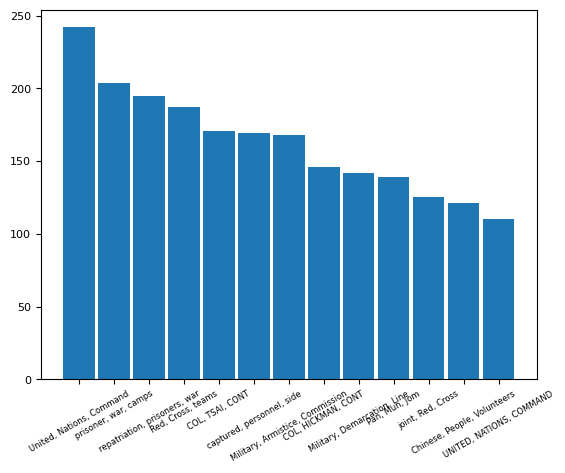

In [ ]:
import matplotlib.pyplot as plt
xaxis = [x for x, y in trigram_freq ][:13]
yaxis = [y for x, y in trigram_freq ][:13]
xaxis_str_list =[ ', '.join(each) for each in xaxis]
print(xaxis_str_list)
print(yaxis)
yaxis = yaxis[:13]
plt.bar(xaxis_str_list, yaxis, width=0.9) #default width is 0.8, If it's 1, histogram.
plt.xticks(rotation=30, fontsize=6, )
plt.yticks(fontsize=8)
plt.show()

## grep command
a linux command to **find matched lines** including patterns from files

!grep 'pattern' filenames

https://www.geeksforgeeks.org/grep-command-in-unixlinux/

How 'would' and 'shall'  are used in Vol.8?

In [ ]:
!grep 'would' Cleaned_data_8/*.txt

Cleaned_data_8/0005.txt:COL SOMERVILLE: I would like to remind your side that you asked for these meetings. I would further like to remind your side that the only important places in the draft Armistice Agreement where there is not an agreement on the meaning of the wording are those places where
Cleaned_data_8/0007.txt:On 28 April the United Nations Command submitted to your side our compromise proposal for an armistice. Naturally, our side accepts the wording of the draft Armistice Agreement which we submitted at that time. We further stated that we would not accept any substantive changes in our proposal. With the exception of one minor change in paragraph 40b, which I will refer to later, the United Nations Command is satisfied with the wording of all the paragraphs as they appear in the draft of the Armistice Agreement presented to you on 28 April.
Cleaned_data_8/0010.txt:COL SOMERVILLE: I would like to make something clear right now. When my Senior Delegate reluctantly agreed to 